<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 177.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 178.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [15]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [9]:
# 対象の重要カラム
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# 各カラムの欠損値の数を表示
missing_counts = df[critical_columns].isnull().sum()
print("Missing values count:\n", missing_counts)

# しきい値を決める（例えば、欠損が全体の20%以上の場合は削除）
threshold = 0.2 * len(df)

# 欠損値処理戦略
for col in critical_columns:
    if missing_counts[col] > threshold:
        print(f"Dropping rows with missing values in {col} (too many missing values).")
        df = df.dropna(subset=[col])
    else:
        print(f"Filling missing values in {col} with mode ({df[col].mode()[0]}).")
        df[col].fillna(df[col].mode()[0], inplace=True)

# 処理後の欠損値確認
print("\nMissing values after handling:\n", df[critical_columns].isnull().sum())


Missing values count:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Filling missing values in Employment with mode (Employed, full-time).
Dropping rows with missing values in JobSat (too many missing values).
Filling missing values in RemoteWork with mode (Hybrid (some remote, some in-person)).

Missing values after handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_300/2461279460.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_300/2461279460.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_300/3519146859.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('Experience_Range')['JobSat'].median()


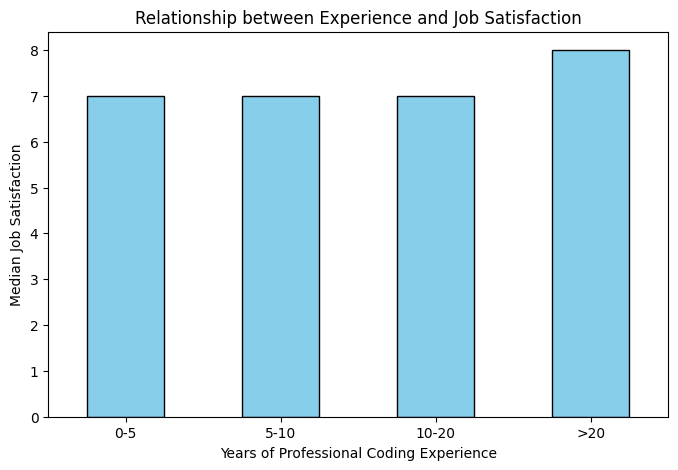

In [10]:
# YearsCodeProとJobSatの欠損値を削除
df = df[['YearsCodePro', 'JobSat']].dropna()

# YearsCodeProを数値型に変換（エラーが出る場合は除外）
df = df[pd.to_numeric(df['YearsCodePro'], errors='coerce').notna()]
df['YearsCodePro'] = df['YearsCodePro'].astype(float)

# 経験年数の範囲を定義
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['Experience_Range'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# 各経験範囲の中央値を計算
median_satisfaction = df.groupby('Experience_Range')['JobSat'].median()

# グラフの作成
plt.figure(figsize=(8, 5))
median_satisfaction.plot(kind='bar', color='skyblue', edgecolor='black')

# ラベル設定
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Relationship between Experience and Job Satisfaction')
plt.xticks(rotation=0)

# グラフの表示
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


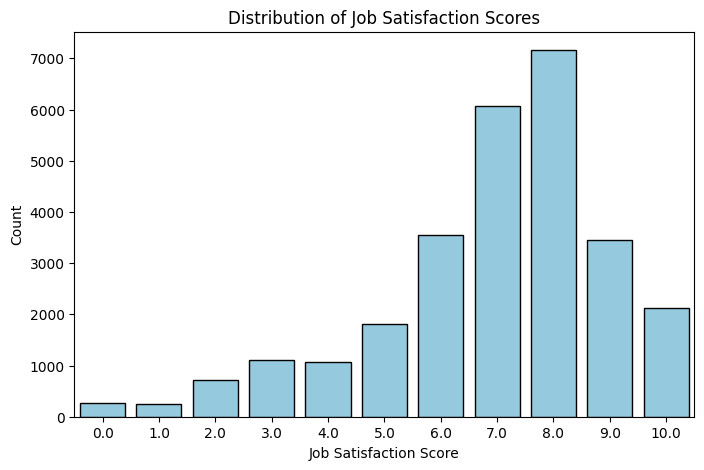

In [11]:
import seaborn as sns

# グラフのサイズ設定
plt.figure(figsize=(8, 5))

# JobSatの分布をカウントプロットで可視化
sns.countplot(x=df['JobSat'], color='skyblue', edgecolor='black')

# ラベル設定
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Scores')
plt.xticks(rotation=0)

# グラフの表示
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


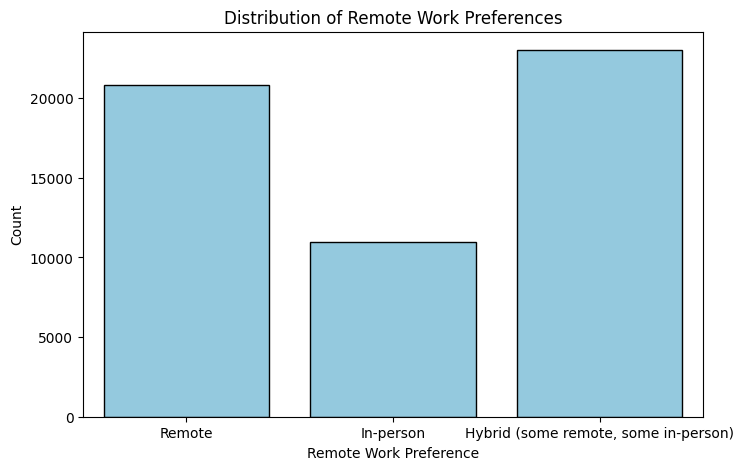

Remote Work Preferences by Employment Type:
Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                17281   
In-person                                            8552   
Remote                                              13193   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       85   
In-person                                                                  32   
Remote                                                                     95   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid (some rem

In [17]:
# RemoteWork の分布をカウントプロットで可視化
plt.figure(figsize=(8, 5))
sns.countplot(x=df['RemoteWork'], color='skyblue', edgecolor='black')

# ラベル設定
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')
plt.xticks(rotation=0)

# グラフの表示
plt.show()

# RemoteWork と Employment によるクロス集計
remote_work_crosstab = pd.crosstab(df['RemoteWork'], df['Employment'])

# クロス集計表を表示
print("Remote Work Preferences by Employment Type:")
print(remote_work_crosstab)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


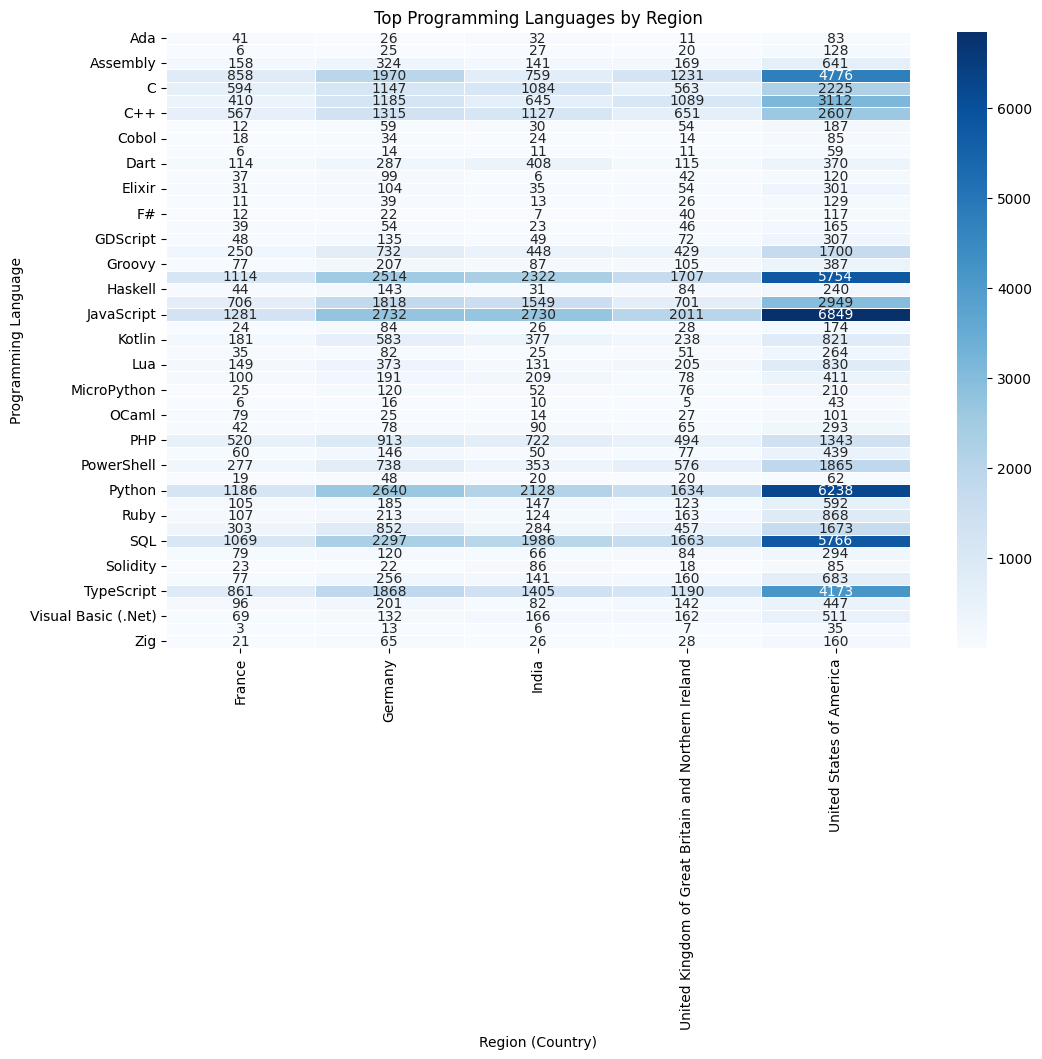

In [18]:
# 言語データのフィルタリング（必要な列を選択）
df_filtered = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# 言語を分割し、それぞれの言語を個別の行に展開
df_exploded = df_filtered.assign(Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# 各国ごとの言語使用回数を集計
language_counts_by_region = df_exploded.groupby(['Country', 'Language']).size().reset_index(name='Count')

# 上位の国・地域を選択（例: 上位5カ国）
top_countries = language_counts_by_region.groupby('Country')['Count'].sum().nlargest(5).index
filtered_data = language_counts_by_region[language_counts_by_region['Country'].isin(top_countries)]

# ヒートマップ用データの作成（ピボットテーブル）
heatmap_data = filtered_data.pivot(index='Language', columns='Country', values='Count').fillna(0)

# 可視化（ヒートマップ）
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, annot=True, fmt=".0f")

# ラベル設定
plt.xlabel('Region (Country)')
plt.ylabel('Programming Language')
plt.title('Top Programming Languages by Region')

# グラフの表示
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


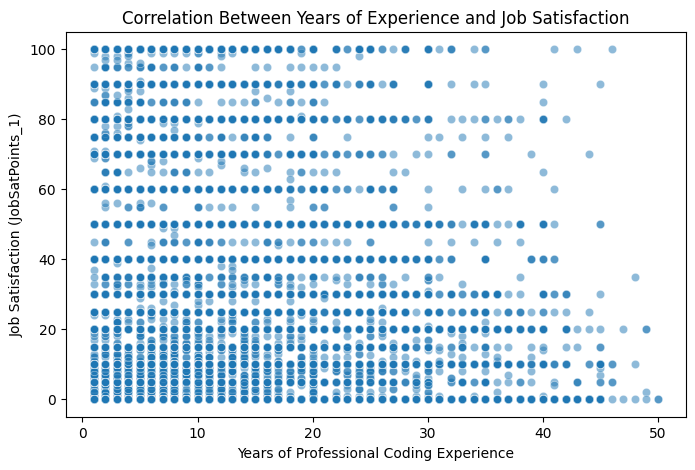

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 必要なカラムの欠損値を削除
df_experience_satisfaction = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# YearsCodeProを数値型に変換（エラーが出る場合は除外）
df_experience_satisfaction = df_experience_satisfaction[pd.to_numeric(df_experience_satisfaction['YearsCodePro'], errors='coerce').notna()]
df_experience_satisfaction['YearsCodePro'] = df_experience_satisfaction['YearsCodePro'].astype(float)

# 散布図の作成
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_experience_satisfaction['YearsCodePro'], y=df_experience_satisfaction['JobSatPoints_1'], alpha=0.5)

# ラベル設定
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.title('Correlation Between Years of Experience and Job Satisfaction')

# グラフの表示
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of Education Level and Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
As

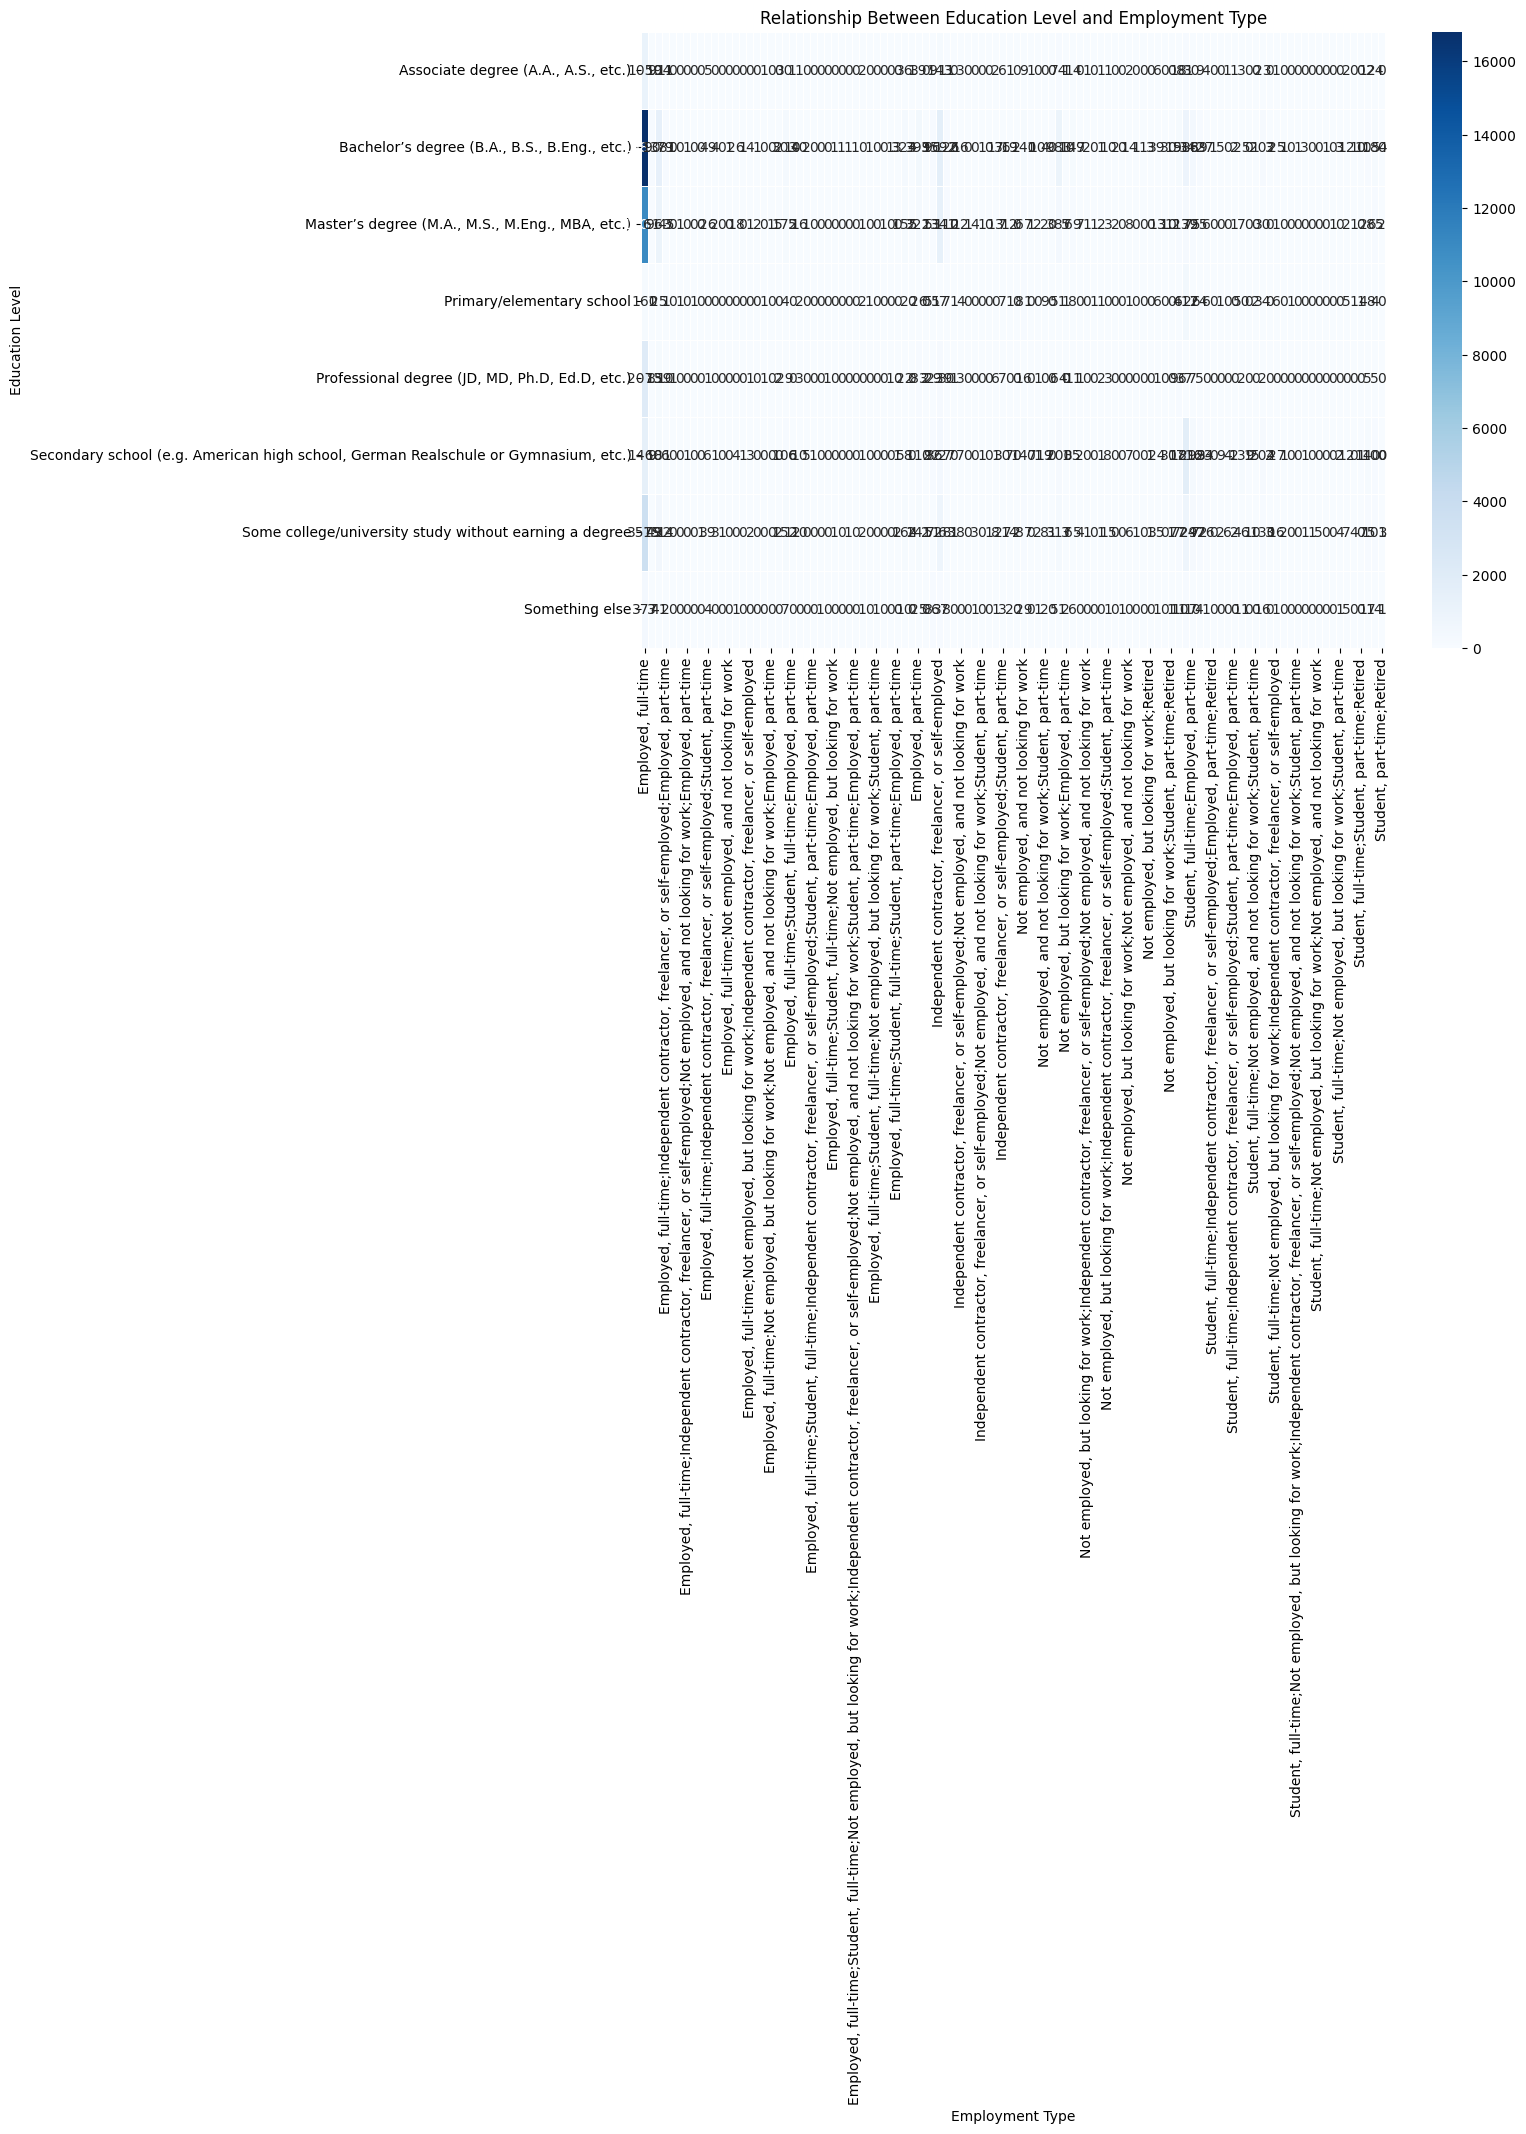

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 必要なカラムのデータを取得し、欠損値を削除
df_education_employment = df[['EdLevel', 'Employment']].dropna()

# 教育レベルと雇用形態のクロス集計
education_employment_crosstab = pd.crosstab(df_education_employment['EdLevel'], df_education_employment['Employment'])

# クロス集計表の表示
print("Cross-tabulation of Education Level and Employment Type:")
print(education_employment_crosstab)

# ヒートマップで可視化
plt.figure(figsize=(12, 8))
sns.heatmap(education_employment_crosstab, cmap='Blues', annot=True, fmt='d', linewidths=0.5)

# ラベル設定
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.title('Relationship Between Education Level and Employment Type')

# グラフの表示
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
